In [48]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
from simulation import *
from analysis import *
from end_to_end import *

# SIR Model on G(n,p) Network

### Resources
* [Her colleague's paper](https://d1b10bmlvqabco.cloudfront.net/attach/k7v24tpzbybzr/jmca5mxi9t361a/k9ye8o2opt8i/jail_paper.pdf)
* [Daily Bruin Article](https://stack.dailybruin.com/2020/05/12/covid-model/)
* [Epidemics on Networks paper](https://arxiv.org/pdf/2001.02436.pdf)

### Coding Documentation

* https://networkx.github.io/documentation/stable/reference/index.html
* https://epidemicsonnetworks.readthedocs.io/en/latest/

### Assumptions:
- Removed inmates can be any state
- Avg. degree of new nodes is correlated with current prison population (aka p is constant)
- Death rate (as in time it takes people to transfer from infected to dead) is equal to the recovery rate

## Possible Things to Work On:

* Simulations are stochastic, so perhaps taking the average over multiple simulations would reduce noise?

## Description of Parameters

* **background_inmate_turnover**: background # of inmates added/released at each time step
* **release_number**: # of inmates to release
* **number_infected_before_release**: number of infected at which to perform release on next integer time
* **rho**: percent of inmates that are initially infected
* **death_rate**: probability of dying after being infected
* **tau**: transmission rate
* **gamma**: recovery rate
* **max_time**: # of time steps to run simulation
* **N**: # of inmates initially
* **p**: probability of contact between inmate and other inmates
* **percent_infected**: percent of general population that is infected
* **percent_recovered**: percent of general population that is recovered
* **save_plot**: should plot of results be saved to computer?
* **stop_inflow_at_intervention**: should we stop the background inflow of inmates at intervention time?
* **title**: title of plot

## Constant Parameters

These parameters are held constant througout the trials.
* background_inmate_turnover=20
* rho=0.0003
* death_rate=0.012
* tau=0.03
* gamma=0.07
* max_time=60
* N=3000
* p=0.02
* percent_infected=0.0035
* percent_recovered=0.0015

**NOTE**: Started experimenting with a lower tau=0.003 in order to produce an initial R0 of about 2.5. Extended max_time too because spread takes longer now.

# Experimental Design

The cases we shall examine are as follows:

1. **Control case**: no release intervention, no stopping of inmate intake
2. **Intervention A**: no release intervention, but stopping of inmate intake
3. **Intervention B**: release intervention and stopping of inmate intake

For case 3, Intervention B, we shall experiment with a range of release numbers and release conditions.

## Control Case

Starting simulation...
Simulation completed.

############################ Parameters #############################
{'release_number': 0, 'number_infected_before_release': 5000, 'stop_inflow_at_intervention': False, 'background_inmate_turnover': 20, 'rho': 0.0003, 'death_rate': 0.012, 'tau': 0.003, 'gamma': 0.07, 'max_time': 120, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': True, 'title': 'Control Case', 'soc_dist': False, 'soc_dist_tau': 0.001, 'same_graph': False, 'graph': 0}

############################## Results ##############################
Total # of infections:  1741
Total # of deaths:  12.0
Infections peaked at:
	Time: 119.75002368590344
	# of infected: 710


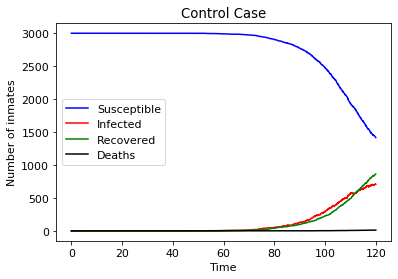

OSError: [Errno 22] Invalid argument: 'plots/simulation_plot_release_number-0__num_inf_bf_release-5000__stp_in_at_int-False__bck_turnover-20__rho-0.0003__death_rate-0.012__tau-0.003__gamma-0.07__max_time-120__N-3000__p-0.02__percent_infected-0.0035__percent_recovered-0.0015__title-Control Case__soc_dist-False__soc_dist_tau-0.001__same_graph-False__graph-0_.png'

<Figure size 432x288 with 0 Axes>

In [50]:
%%time
t, S, I, R, D = (end_to_end(release_number=0, 
                            tau=0.003,
                            max_time=120,
                            number_infected_before_release=5000, 
                            stop_inflow_at_intervention=False, 
                            save_plot=True,
                            title='Control Case'))

## Intervention A: no release intervention, but stop inmate inflow

**NOTE**: For the intervention trials, the intervention does not occur exactly when there are `number_infected_before_release` infected inmates. Instead, the actual intervention occurs at the next integer-valued time step after the `number_infected_before_release` condition has been met. By the time it occurs, the '# of infected' may be much higher than `number_infected_before_release` (I've seen it being 4.5x higher). So, I have ran trials repeatedly until the intervention kicks in at a similar # of infected for each experiment case (around 110 - 120 infected people when the intervention kicks in).

Starting simulation...
Release intervention condition met:
	Time: 35
	# of infected: 113
	Releasing 0 inmates.
	Stopping inmate inflow.
Simulation completed.

############################ Parameters #############################
{'release_number': 0, 'number_infected_before_release': 100, 'stop_inflow_at_intervention': True, 'background_inmate_turnover': 20, 'rho': 0.0003, 'death_rate': 0.012, 'tau': 0.003, 'gamma': 0.07, 'max_time': 120, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': True, 'title': 'Intervention A', 'soc_dist': False, 'soc_dist_tau': 0.001, 'same_graph': False, 'graph': 0}

############################## Results ##############################
Total # of infections:  1709
Total # of deaths:  18.0
Infections peaked at:
	Time: 62.45985003903789
	# of infected: 404


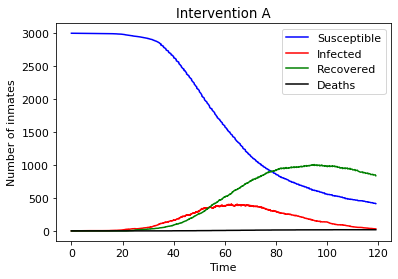

OSError: [Errno 22] Invalid argument: 'plots/simulation_plot_release_number-0__num_inf_bf_release-100__stp_in_at_int-True__bck_turnover-20__rho-0.0003__death_rate-0.012__tau-0.003__gamma-0.07__max_time-120__N-3000__p-0.02__percent_infected-0.0035__percent_recovered-0.0015__title-Intervention A__soc_dist-False__soc_dist_tau-0.001__same_graph-False__graph-0_.png'

<Figure size 432x288 with 0 Axes>

In [51]:
%%time
t, S, I, R, D = (end_to_end(release_number=0,
                            tau=0.003,
                            max_time=120,
                            number_infected_before_release=100, 
                            stop_inflow_at_intervention=True, 
                            save_plot=True,
                            title='Intervention A'))

## Intervention B: release intervention and stopping of inmate intake

Starting simulation...
Release intervention condition met:
	Time: 24
	# of infected: 103
	Releasing 500 inmates.
	Stopping inmate inflow.
Simulation completed.

############################ Parameters #############################
{'release_number': 500, 'number_infected_before_release': 100, 'stop_inflow_at_intervention': True, 'background_inmate_turnover': 20, 'rho': 0.0003, 'death_rate': 0.012, 'tau': 0.003, 'gamma': 0.07, 'max_time': 120, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': True, 'title': 'Intervention B: release number = 500', 'soc_dist': False, 'soc_dist_tau': 0.001, 'same_graph': False, 'graph': 0}

############################## Results ##############################
Total # of infections:  928
Total # of deaths:  10.0
Infections peaked at:
	Time: 43.17076578928889
	# of infected: 210


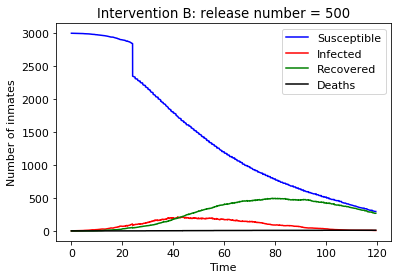

Plot saved with filename: simulation_plot_release_number-500__num_inf_bf_release-100__stp_in_at_int-True__bck_turnover-20__rho-0.0003__death_rate-0.012__tau-0.003__gamma-0.07__max_time-120__N-3000__p-0.02__percent_infected-0.0035__percent_recovered-0.0015__title-Intervention B: release number = 500__soc_dist-False__soc_dist_tau-0.001__same_graph-False__graph-0_
Wall time: 2.09 s


<Figure size 432x288 with 0 Axes>

In [52]:
%%time
t, S, I, R, D = (end_to_end(release_number=500, 
                            tau=0.003,
                            max_time=120,
                            number_infected_before_release=100, 
                            stop_inflow_at_intervention=True, 
                            save_plot=True,
                            title='Intervention B: release number = 500'))

Starting simulation...
Release intervention condition met:
	Time: 39
	# of infected: 109
	Releasing 1000 inmates.
	Stopping inmate inflow.
Simulation completed.

############################ Parameters #############################
{'release_number': 1000, 'number_infected_before_release': 100, 'stop_inflow_at_intervention': True, 'background_inmate_turnover': 20, 'rho': 0.0003, 'death_rate': 0.012, 'tau': 0.003, 'gamma': 0.07, 'max_time': 120, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': True, 'title': 'Intervention B: release number = 1000', 'soc_dist': False, 'soc_dist_tau': 0.001, 'same_graph': False, 'graph': 0}

############################## Results ##############################
Total # of infections:  518
Total # of deaths:  5.0
Infections peaked at:
	Time: 38.95984856036284
	# of infected: 109


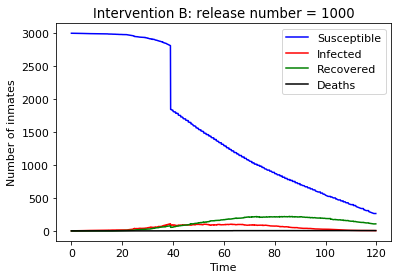

Plot saved with filename: simulation_plot_release_number-1000__num_inf_bf_release-100__stp_in_at_int-True__bck_turnover-20__rho-0.0003__death_rate-0.012__tau-0.003__gamma-0.07__max_time-120__N-3000__p-0.02__percent_infected-0.0035__percent_recovered-0.0015__title-Intervention B: release number = 1000__soc_dist-False__soc_dist_tau-0.001__same_graph-False__graph-0_
Wall time: 2.35 s


<Figure size 432x288 with 0 Axes>

In [53]:
%%time
t, S, I, R, D = (end_to_end(release_number=1000, 
                            tau=0.003,
                            max_time=120,
                            number_infected_before_release=100, 
                            stop_inflow_at_intervention=True, 
                            save_plot=True,
                            title='Intervention B: release number = 1000'))

Starting simulation...
Release intervention condition met:
	Time: 53
	# of infected: 100
	Releasing 1500 inmates.
	Stopping inmate inflow.
Simulation completed.

############################ Parameters #############################
{'release_number': 1500, 'number_infected_before_release': 100, 'stop_inflow_at_intervention': True, 'background_inmate_turnover': 20, 'rho': 0.0003, 'death_rate': 0.012, 'tau': 0.003, 'gamma': 0.07, 'max_time': 120, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': True, 'title': 'Intervention B: release number = 1500', 'soc_dist': False, 'soc_dist_tau': 0.001, 'same_graph': False, 'graph': 0}

############################## Results ##############################
Total # of infections:  261
Total # of deaths:  3.0
Infections peaked at:
	Time: 52.96357004755487
	# of infected: 100


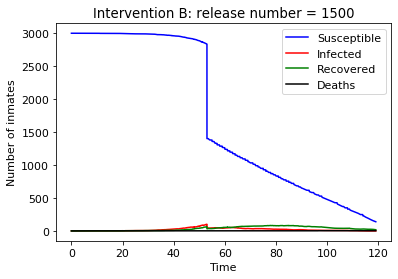

Plot saved with filename: simulation_plot_release_number-1500__num_inf_bf_release-100__stp_in_at_int-True__bck_turnover-20__rho-0.0003__death_rate-0.012__tau-0.003__gamma-0.07__max_time-120__N-3000__p-0.02__percent_infected-0.0035__percent_recovered-0.0015__title-Intervention B: release number = 1500__soc_dist-False__soc_dist_tau-0.001__same_graph-False__graph-0_
Wall time: 2.57 s


<Figure size 432x288 with 0 Axes>

In [54]:
%%time
t, S, I, R, D = (end_to_end(release_number=1500, 
                            tau=0.003,
                            max_time=120,
                            number_infected_before_release=100, 
                            stop_inflow_at_intervention=True, 
                            save_plot=True,
                            title='Intervention B: release number = 1500'))

Starting simulation...
Release intervention condition met:
	Time: 34
	# of infected: 102
	Releasing 500 inmates.
	Stopping inmate inflow.
Simulation completed.

############################ Parameters #############################
{'release_number': 500, 'number_infected_before_release': 100, 'stop_inflow_at_intervention': True, 'background_inmate_turnover': 20, 'rho': 0.0003, 'death_rate': 0.012, 'tau': 0.003, 'gamma': 0.07, 'max_time': 120, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': True, 'title': 'Intervention B: release number = 500', 'soc_dist': False, 'soc_dist_tau': 0.001, 'same_graph': False, 'graph': 0}

############################## Results ##############################
Total # of infections:  999
Total # of deaths:  11.0
Infections peaked at:
	Time: 62.688364254431804
	# of infected: 254


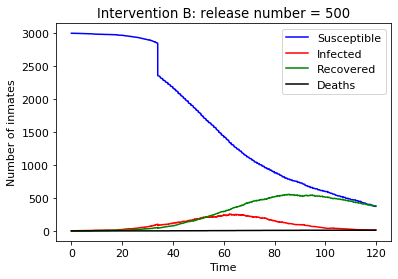

Plot saved with filename: simulation_plot_release_number-500__num_inf_bf_release-100__stp_in_at_int-True__bck_turnover-20__rho-0.0003__death_rate-0.012__tau-0.003__gamma-0.07__max_time-120__N-3000__p-0.02__percent_infected-0.0035__percent_recovered-0.0015__title-Intervention B: release number = 500__soc_dist-False__soc_dist_tau-0.001__same_graph-False__graph-0_
Wall time: 2.38 s


<Figure size 432x288 with 0 Axes>

In [55]:
%%time
t, S, I, R, D = (end_to_end(release_number=500, 
                            tau=0.003,
                            max_time=120,
                            number_infected_before_release=100, 
                            stop_inflow_at_intervention=True, 
                            save_plot=True,
                            title='Intervention B: release number = 500'))

Starting simulation...
Release intervention condition met:
	Time: 71
	# of infected: 106
	Releasing 500 inmates.
	Stopping inmate inflow.
Simulation completed.

############################ Parameters #############################
{'release_number': 500, 'number_infected_before_release': 100, 'stop_inflow_at_intervention': True, 'background_inmate_turnover': 20, 'rho': 0.0003, 'death_rate': 0.012, 'tau': 0.003, 'gamma': 0.07, 'max_time': 120, 'N': 3000, 'p': 0.02, 'percent_infected': 0.0035, 'percent_recovered': 0.0015, 'save_plot': True, 'title': 'Intervention B: release number = 500', 'soc_dist': False, 'soc_dist_tau': 0.001, 'custom_graph': True, 'graph': <networkx.classes.graph.Graph object at 0x0000014705406988>, 'constant_patient_zero': True, 'patient_zero_number': 0}

############################## Results ##############################
Total # of infections:  901
Total # of deaths:  8.0
Infections peaked at:
	Time: 100.9390562557229
	# of infected: 203


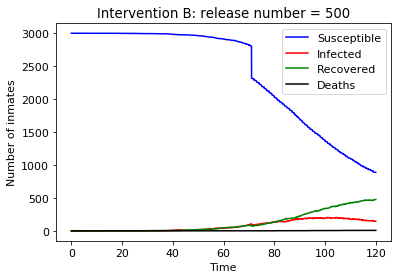

Plot saved with filename: simulation_plot_release_number-500__num_inf_bf_release-100__stp_in_at_int-True__bck_turnover-20__rho-0.0003__death_rate-0.012__tau-0.003__gamma-0.07__max_time-120__N-3000__p-0.02__percent_infected-0.0035__percent_recovered-0.0015__title-Intervention B: release number = 500__soc_dist-False__soc_dist_tau-0.001__custom_graph-True__graph-__constant_patient_zero-True__patient_zero_number-0_
Wall time: 3.48 s


<Figure size 432x288 with 0 Axes>

In [61]:
%%time
N = 3000
p = 0.02
G = nx.fast_gnp_random_graph(N, p)
t, S, I, R, D = (end_to_end(release_number=500, 
                            tau=0.003,
                            max_time=120,
                            number_infected_before_release=100, 
                            stop_inflow_at_intervention=True, 
                            save_plot=True,
                            custom_graph=True,
                            graph=G,
                            constant_patient_zero=True,
                            title='Intervention B: release number = 500'))